# Movielens DataViz'
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
plt.rcParams.update({'font.size': 20})
genres_list = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Crime', 'Horror', 'Documentary', 'Adventure', 'Sci-Fi', 'Mystery', 'Fantasy', 'War', 'Children', 'Musical', 'Animation', 'Western', 'Film-Noir', '(no genres listed)', 'IMAX', 'others']
colors = ['#57cc99', '#ffd500', '#3a86ff', '#fd3e81', '#65010c', '#b3c0a4', '#cf0606', '#fed0bb', '#38b000', '#702892', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab', '#748cab']
COLORS = dict(zip(genres_list, colors))
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE) 
plt.rc('font', weight='normal')         
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', titleweight="bold")    
plt.rc('axes', labelweight="normal")   
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)


In [2]:
def na_info(df):
    na = df.isna().sum(axis=0)
    dfna = pd.DataFrame(data = {'nb':na, 'rate':na/df.shape[0]}, index=na.index)
    return dfna

## Importation des csv, creation des dataframes, affichage des premières lignes

In [3]:
movies = pd.read_csv('datasets\ml-20m\movies.csv', index_col='movieId')
ratings = pd.read_csv(r'datasets\ml-20m\ratings.csv')
tags = pd.read_csv(r'datasets\ml-20m\tags.csv')
genome_tags = pd.read_csv('datasets\ml-20m\genome-tags.csv')
genome_scores = pd.read_csv('datasets\ml-20m\genome-scores.csv')

In [4]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.drop('timestamp', axis=1)
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
tags.drop('timestamp', axis=1)
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [7]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [8]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


## Création du dataframe genres

In [9]:
genres = movies['genres'].str.split('|').explode()
genres = genres.reset_index()

In [10]:
genres = genres.rename({'genres':'genre'}, axis=1)
genres.head(10)

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


In [11]:
genres.groupby('genre').count()

,movieId
genre,
(no genres listed),246
Action,3520
Adventure,2329
Animation,1027
Children,1139
Comedy,8374
Crime,2939
Documentary,2471
Drama,13344


## Importation de title.basics de imdb pour récupérer l'année et le titre de chaque film

In [12]:
title_basics = pd.read_csv(r'datasets\imdb\title.basics.tsv.gz', compression='gzip', sep='\t')

C:\Users\pierr\anaconda3\envs\datascience\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [14]:
title_basics['imdbId'] = title_basics['tconst'].str[2:].astype('int')

In [15]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8268702 entries, 0 to 8268701
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
 9   imdbId          int32 
dtypes: int32(1), object(9)
memory usage: 599.3+ MB


In [16]:
links = pd.read_csv('datasets\ml-20m\links.csv', index_col='movieId')

In [17]:
movies = pd.merge(movies, links['imdbId'], left_index=True, right_index=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27278 entries, 1 to 131262
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   27278 non-null  object
 1   genres  27278 non-null  object
 2   imdbId  27278 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [18]:
movies = movies.reset_index()
movies = movies.merge(title_basics[['imdbId', 'originalTitle', 'startYear']], on='imdbId')


In [19]:
movies = movies[['movieId', 'imdbId', 'originalTitle', 'startYear']]
movies = movies.rename({'originalTitle':'title', 'startYear':'year'}, axis='columns')
movies.head()

,movieId,imdbId,title,year
0,1,114709,Toy Story,1995
1,2,113497,Jumanji,1995
2,3,113228,Grumpier Old Men,1995
3,4,114885,Waiting to Exhale,1995
4,5,113041,Father of the Bride Part II,1995


In [20]:
na_info(movies)

,nb,rate
movieId,0,0.0
imdbId,0,0.0
title,0,0.0
year,0,0.0


In [21]:
ratings = ratings.merge(movies['movieId'], on='movieId')
tags = tags.merge(movies['movieId'], on='movieId')
genome_scores = genome_scores.merge(movies['movieId'], on='movieId')
genres = genres.merge(movies['movieId'], on='movieId')

In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984869 entries, 0 to 19984868
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.4 MB


## Données sur les films

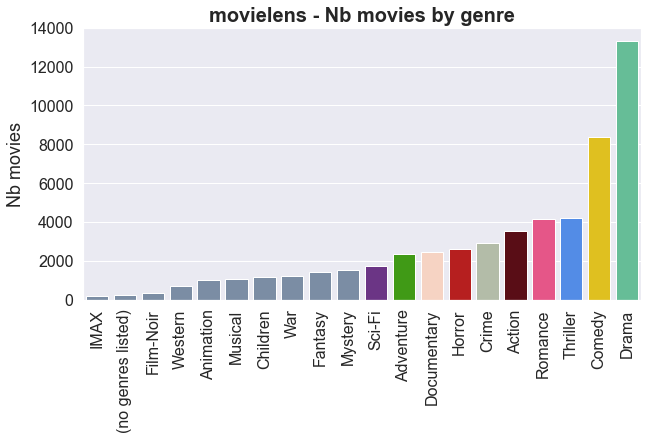

In [23]:
nb_movies_by_genre = genres['genre'].value_counts().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=nb_movies_by_genre.index, y=nb_movies_by_genre, palette=[COLORS[c] for c in nb_movies_by_genre.index.to_list()])
plt.title('movielens - Nb movies by genre')
plt.ylabel('Nb movies')
plt.xticks(rotation=90);

In [24]:
genres_info = genres.groupby('genre').agg(NbMovie=('movieId', 'count')).sort_values('NbMovie', ascending=False)
genres_info.reset_index()


,genre,NbMovie
0,Drama,13334
1,Comedy,8362
2,Thriller,4175
3,Romance,4124
4,Action,3516
5,Crime,2936
6,Horror,2607
7,Documentary,2457
8,Adventure,2321
9,Sci-Fi,1738


In [25]:

main_genres = genres_info.iloc[:10,:]
other_genres = genres_info.iloc[10:,:]
main_genres.loc['others', 'NbMovie'] = other_genres['NbMovie'].sum()
main_genres


<ipython-input-25-c39225ed311b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_genres.loc['others', 'NbMovie'] = other_genres['NbMovie'].sum()


,NbMovie
genre,
Drama,13334.0
Comedy,8362.0
Thriller,4175.0
Romance,4124.0
Action,3516.0
Crime,2936.0
Horror,2607.0
Documentary,2457.0
Adventure,2321.0


Text(0.5, 1.0, 'movielens - Genre distribution')

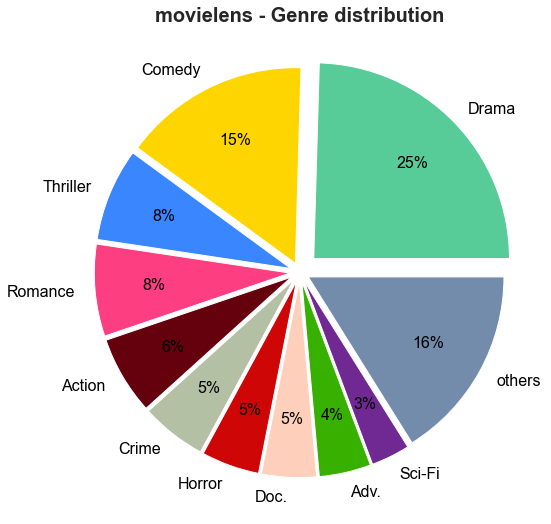

In [26]:

plt.figure(figsize=(9, 9))
colors = [COLORS[c] for c in main_genres.index.to_list()]
explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(main_genres['NbMovie'],
        labels=main_genres.rename({'Documentary':'Doc.', 'Adventure':'Adv.'}).index,
        labeldistance=1.1,
        rotatelabels=False,
        colors=colors,
        explode=explode,
        autopct='%1.f%%',
        pctdistance=0.7,
        textprops=dict(color='black'));
plt.title('movielens - Genre distribution')

Text(0.5, 1.0, 'movielens - Nb movies by year')

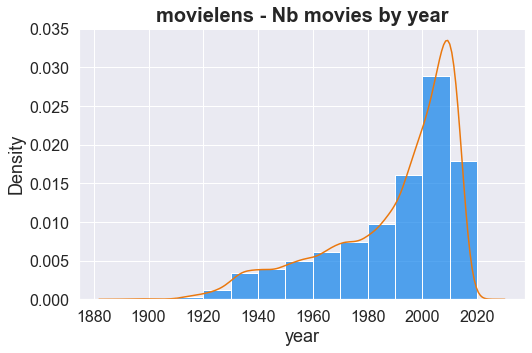

In [27]:
plt.figure(figsize=(8, 5))
movies['year'] = movies['year'].astype('int')
sns.histplot(x='year', data=movies, binwidth=10, binrange=[1900, 2020], stat='density', color='#0E81EA', alpha=0.7);
sns.kdeplot(x='year', data=movies, color='#ea780e')
plt.title('movielens - Nb movies by year')

In [28]:
genre_ratings = pd.merge(genres, ratings, on='movieId')
genre_ratings.info()

In [ ]:
genres_ratings_infos = genre_ratings.groupby('genre').agg(medianRating=('rating', 'median'),
                                                          averageRating=('rating', 'mean'),
                                                          nbReviews=('genre', 'count'))

In [ ]:
genres_ratings_infos = genres_ratings_infos.reset_index()
genres_ratings_infos.sort_values(by='nbReviews')

,genre,medianRating,averageRating,nbReviews
0,(no genres listed),3.0,3.006964,359
10,Film-Noir,4.0,3.965381,216689
7,Documentary,4.0,3.741298,244304
19,Western,4.0,3.570498,423714
12,IMAX,4.0,3.655946,492366
13,Musical,4.0,3.557860,870215
18,War,4.0,3.809531,1048615
3,Animation,4.0,3.616007,1131173
11,Horror,3.5,3.277426,1482328
14,Mystery,4.0,3.663477,1557095


Text(0.5, 1.0, 'movielens - Nb reviews by genre')

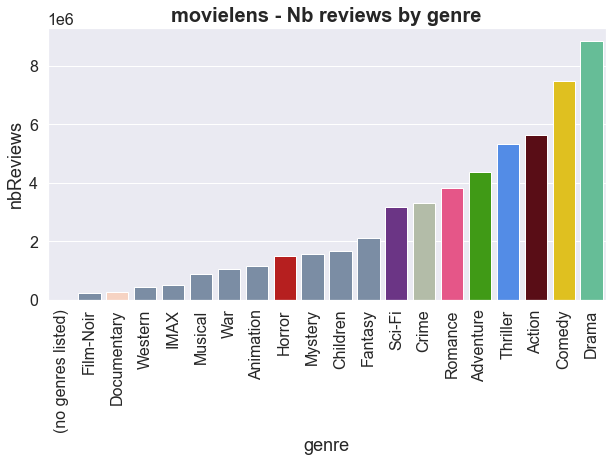

In [ ]:
gri = genres_ratings_infos.sort_values(by='nbReviews')
plt.figure(figsize=(10, 5))
sns.barplot(x='genre', y='nbReviews', data=gri, palette=[COLORS[c] for c in gri['genre'].to_list()])
plt.xticks(rotation=90);
plt.title('movielens - Nb reviews by genre')

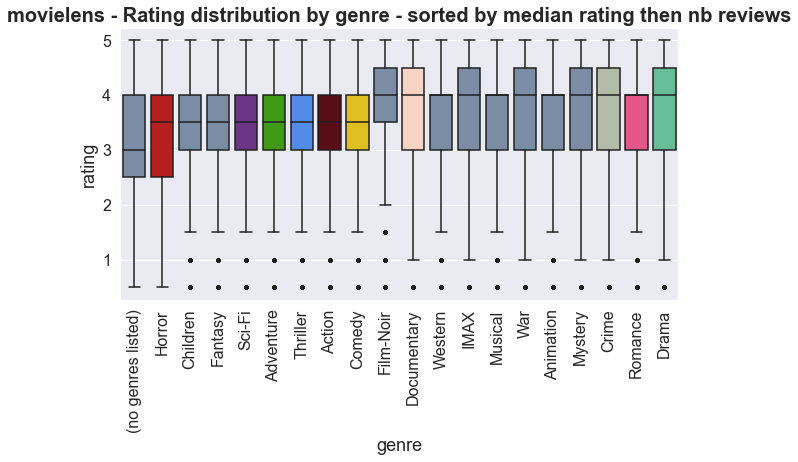

In [ ]:
gri = gri.sort_values(by=['medianRating', 'nbReviews'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='genre', y='rating', data=genre_ratings, order=gri['genre'], fliersize=3, palette=[COLORS[c] for c in gri['genre'].to_list()])
plt.title('movielens - Rating distribution by genre - sorted by median rating then nb reviews')
plt.xticks(rotation = 90);

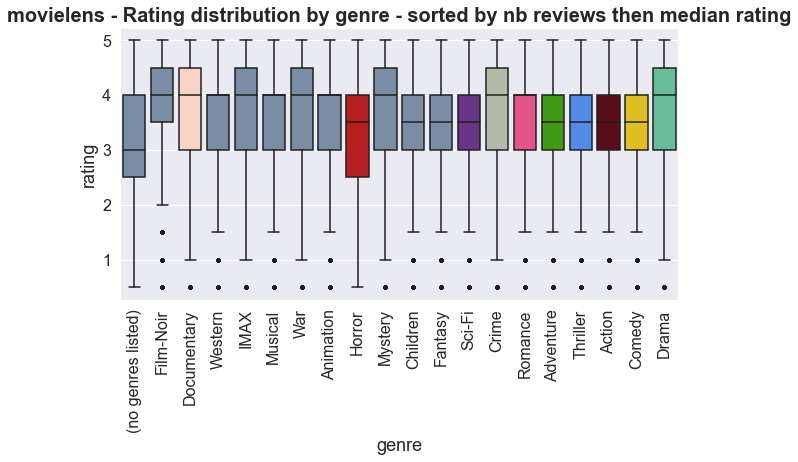

In [ ]:
gri = gri.sort_values(by=['nbReviews', 'medianRating'])
plt.figure(figsize=(10, 5))
sns.boxplot(x='genre', y='rating', data=genre_ratings, order=gri['genre'], fliersize=3, palette=[COLORS[c] for c in gri['genre'].to_list()])
plt.title('movielens - Rating distribution by genre - sorted by nb reviews then median rating')
plt.xticks(rotation = 90);

In [ ]:
top_5_genres_by_nb_reviews = genre_ratings['genre'].value_counts()[:5].index
top_10_genres_by_nb_reviews = genre_ratings['genre'].value_counts()[:10].index
top_5_most_reviewed = genre_ratings[genre_ratings['genre'].isin(top_5_genres_by_nb_reviews)]
top_10_most_reviewed = genre_ratings[genre_ratings['genre'].isin(top_10_genres_by_nb_reviews)]
top_10_sample = top_10_most_reviewed.sample(10000)
top_5_sample = top_5_most_reviewed.sample(10000)

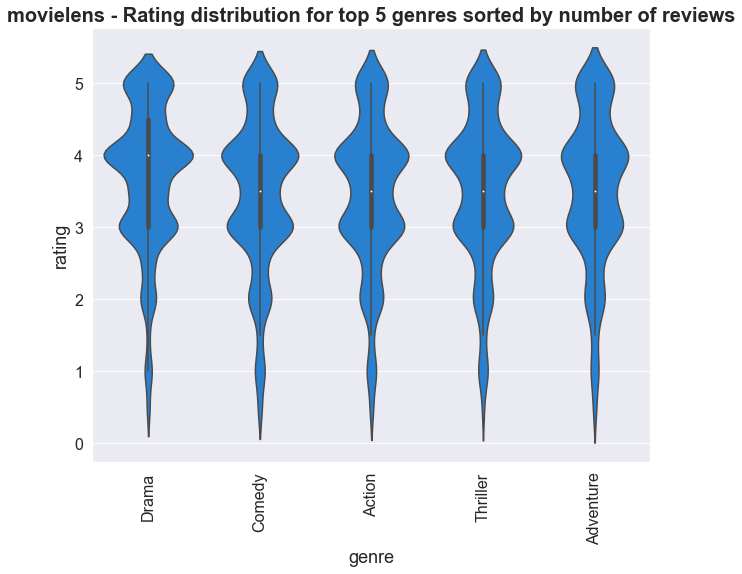

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='genre',
               y='rating',
               data=top_5_sample,
               order = top_5_genres_by_nb_reviews,
               color='#0E81EA')
plt.title('movielens - Rating distribution for top 5 genres sorted by number of reviews')
plt.xticks(rotation=90);

In [ ]:
gri = genres_ratings_infos.sort_values(by='averageRating')
genre_ratings_average = genres_ratings_infos[genres_ratings_infos['genre'].isin(top_10_genres_by_nb_reviews)].sort_values(by='averageRating')
plt.figure(figsize=(7, 5))
sns.barplot(x='genre', y='averageRating', data=genre_ratings_average, color=[COLORS[c] for c in gri['genre'].to_list()], alpha=1)
plt.title('movielens - Average rating for top 10 most reviewed genres')
plt.ylim(3.3, 3.7)
plt.xticks(rotation=90);

ValueError: RGBA sequence should have length 3 or 4

<Figure size 504x360 with 0 Axes>

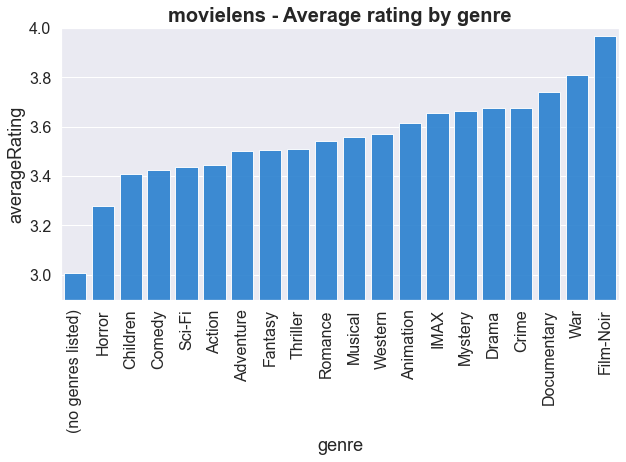

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='genre', y='averageRating', data=genres_ratings_infos, order=genres_ratings_infos.sort_values(by='averageRating')['genre'], color='#0E81EA', alpha=0.9)
plt.title('movielens - Average rating by genre')
plt.ylim(2.9, 4)
plt.xticks(rotation=90);

## Donnees ratings

In [ ]:
movies_ratings = ratings.groupby('movieId').agg(nbReviews=('userId', 'count'), averageRating=('rating', 'mean'))
movies_ratings.head()

,nbReviews,averageRating
movieId,,
1,49695,3.921240
2,22243,3.211977
3,12735,3.151040
4,2756,2.861393
5,12161,3.064592


Text(0.5, 1.0, 'movielens - Average rating by nb of reviews')

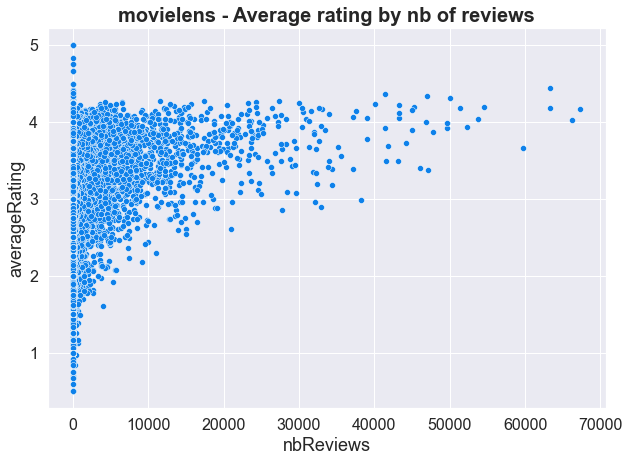

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='nbReviews', y='averageRating', data=movies_ratings, color='#0E81EA')
plt.title('movielens - Average rating by nb of reviews')

Text(0.5, 1.0, 'movielens - Average rating by nb of reviews')

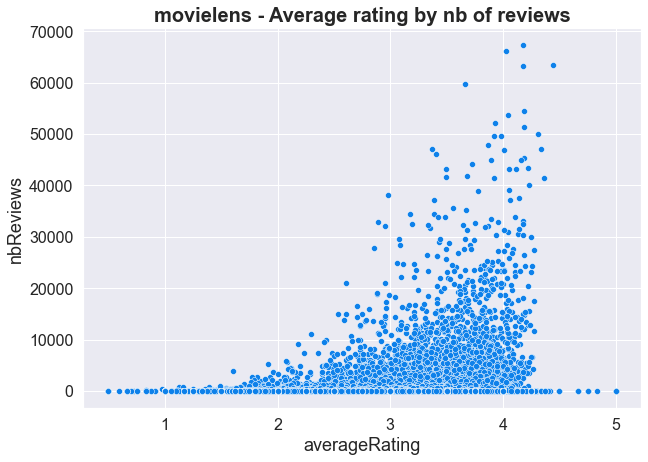

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='averageRating', y='nbReviews', data=movies_ratings, color='#0E81EA')
plt.title('movielens - Average rating by nb of reviews')

Text(0.5, 1.0, 'movielens - Rating distribution')

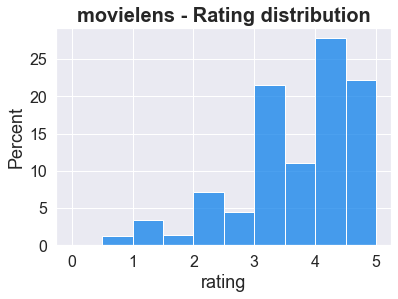

In [ ]:
sns.histplot(x='rating', data=ratings, stat='percent', binwidth=0.5, binrange=[0, 5], color='#0E81EA')
plt.title('movielens - Rating distribution')

Text(0.5, 1.0, 'movielens - Rating distribution')

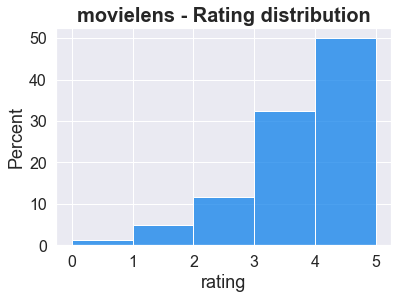

In [ ]:
sns.histplot(x='rating', data=ratings, stat='percent', binwidth=1, binrange=[0, 5], color='#0E81EA')
plt.title('movielens - Rating distribution')

In [ ]:
ratings_users = ratings.groupby('userId').agg(nbReviews=('movieId', 'count'),
                                              averageRating=('rating', 'mean'),
                                              medianRating=('rating', 'median'))

In [ ]:
ratings_users = ratings_users.sort_values(by=['nbReviews', 'averageRating'])
ratings_users.tail()


,nbReviews,averageRating,medianRating
userId,,,
125794,5485,3.763081,4.0
121535,5514,2.793798,3.0
82418,5638,3.516850,3.5
8405,7509,3.209016,3.0
118205,9247,3.279063,3.0


Text(0.5, 1.0, 'Nb of reviews distribution')

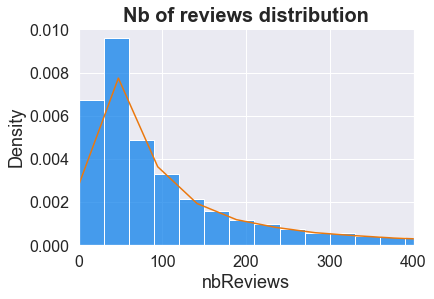

In [ ]:

sns.histplot(x='nbReviews', data=ratings_users, stat='density', binwidth=30, binrange=[0, 400], color='#0E81EA')
sns.kdeplot(x='nbReviews', data=ratings_users, color='#ea780e')
plt.xlim([0, 400])
plt.title('Nb of reviews distribution')

Text(0.5, 1.0, 'movielens - Nb reviews distribution among users')

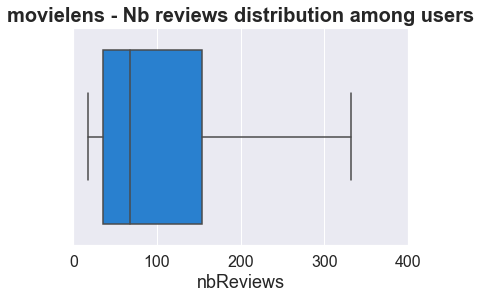

In [ ]:
sns.boxplot(x='nbReviews', data=ratings_users, fliersize=0, color='#0E81EA')
plt.xlim((0, 400))
plt.title('movielens - Nb reviews distribution among users')

Text(0.5, 1.0, 'movielens - Rating distribution among users')

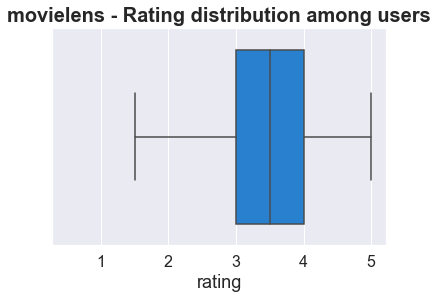

In [ ]:
sns.boxplot(x='rating', data=ratings, fliersize=0, color='#0E81EA')
plt.title('movielens - Rating distribution among users')

Text(0.5, 1.0, 'movielens - Rating distribution among users')

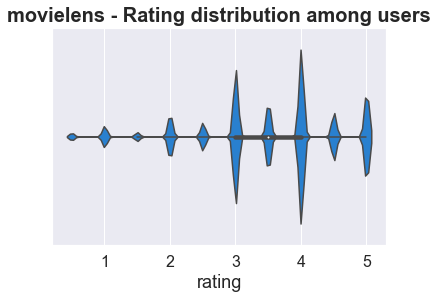

In [ ]:
sns.violinplot(x='rating', data=ratings, color='#0E81EA')
plt.title('movielens - Rating distribution among users')

Text(0.5, 1.0, 'movielens - Rating distribution')

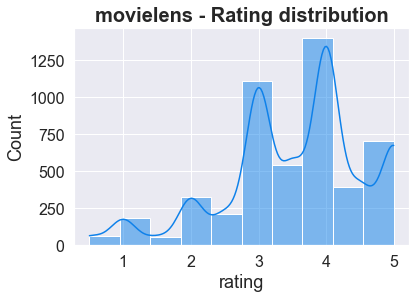

In [ ]:
sns.histplot(x='rating', data=ratings.sample(5000), bins=10, kde=True, color='#0E81EA')
plt.title('movielens - Rating distribution')

Text(0.5, 1.0, 'movielens - Users average rating by nb of reviews')

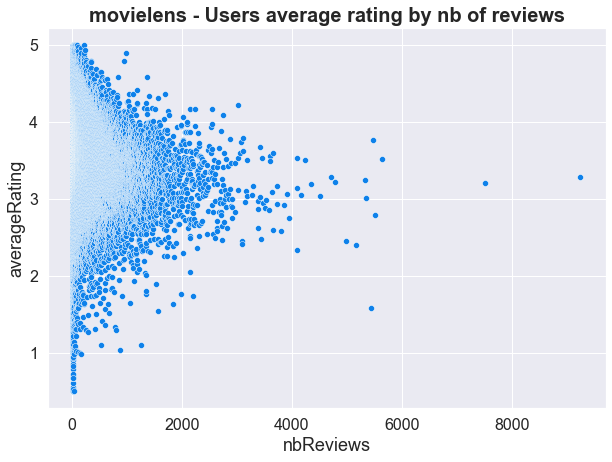

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='nbReviews', y='averageRating', data=ratings_users, color='#0E81EA')
plt.title('movielens - Users average rating by nb of reviews')

In [ ]:
r = ratings.groupby('movieId').agg(NbReviews=('movieId', 'count'), averageRating=('rating', 'mean'))
r.reset_index()

,movieId,NbReviews,averageRating
0,1,49695,3.921240
1,2,22243,3.211977
2,3,12735,3.151040
3,4,2756,2.861393
4,5,12161,3.064592
...,...,...,...
26693,131254,1,4.000000
26694,131256,1,4.000000
26695,131258,1,2.500000
26696,131260,1,3.000000


Text(0.5, 1.0, 'movielens - Average user rating distribution')

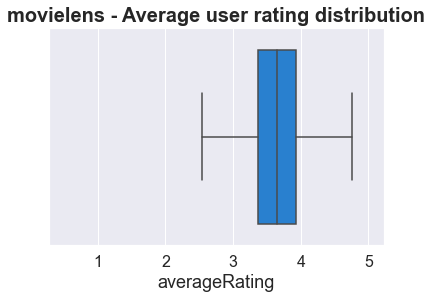

In [ ]:
sns.boxplot(x='averageRating', data=ratings_users, fliersize=0, color='#0E81EA')
plt.title('movielens - Average user rating distribution')

Text(0.5, 1.0, 'movilens - Average rating for each nbReviews quantile')

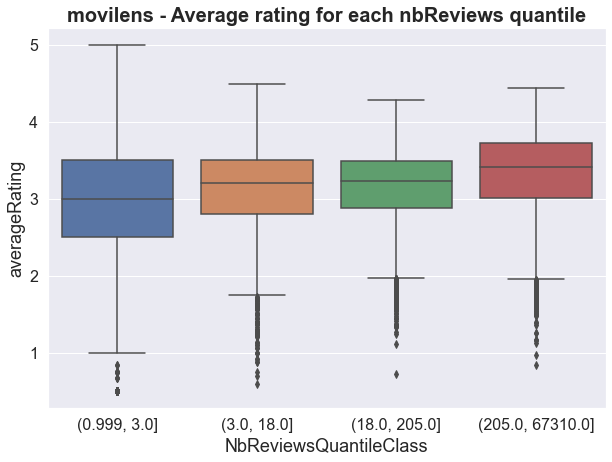

In [ ]:
plt.figure(figsize=(10, 7))
r['NbReviewsQuantileClass'] = pd.qcut(r['NbReviews'], 4)
sns.boxplot(x='NbReviewsQuantileClass', y='averageRating', data=r)
plt.title('movilens - Average rating for each nbReviews quantile')


In [ ]:
rt = ratings.merge(movies[['year', 'movieId']], on='movieId')



In [ ]:
rt = rt.groupby(by=['movieId']).agg(averageRating=('rating', 'mean'), year=('year','mean'))


In [ ]:
rt

,averageRating,year
movieId,,
1,3.921240,1995
2,3.211977,1995
3,3.151040,1995
4,2.861393,1995
5,3.064592,1995
...,...,...
131254,4.000000,2007
131256,4.000000,2002
131258,2.500000,2014


In [ ]:

rt['year'] = pd.qcut(rt['year'], 4)

Text(0.5, 1.0, 'movielens - Average by year quantile')

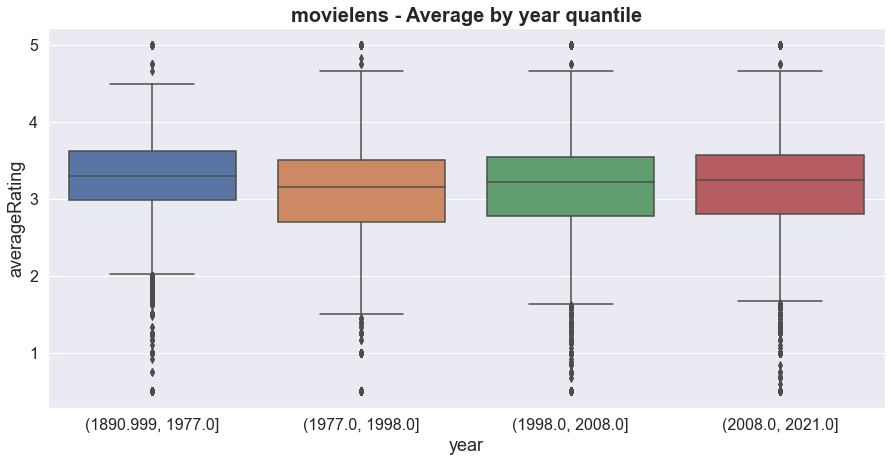

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='year', y='averageRating', data=rt)
plt.title('movielens - Average by year quantile')
